In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().sum()/len(df)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.shape

(19158, 13)

## Complete Case Analysis


In [8]:
# we select only those columns in which data is less than 5% missing

In [10]:
col = df[['city_development_index' , 'enrolled_university' , 'education_level' , 'experience' , 'training_hours']]

In [11]:
col

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [13]:
col['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [15]:
len(col.dropna())/len(df)   # 89 percent data will be remaining after cca 

0.8968577095730244

In [16]:
new_df = col.dropna()

In [17]:
df.shape ,  new_df.shape

((19158, 13), (17182, 5))

In [18]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


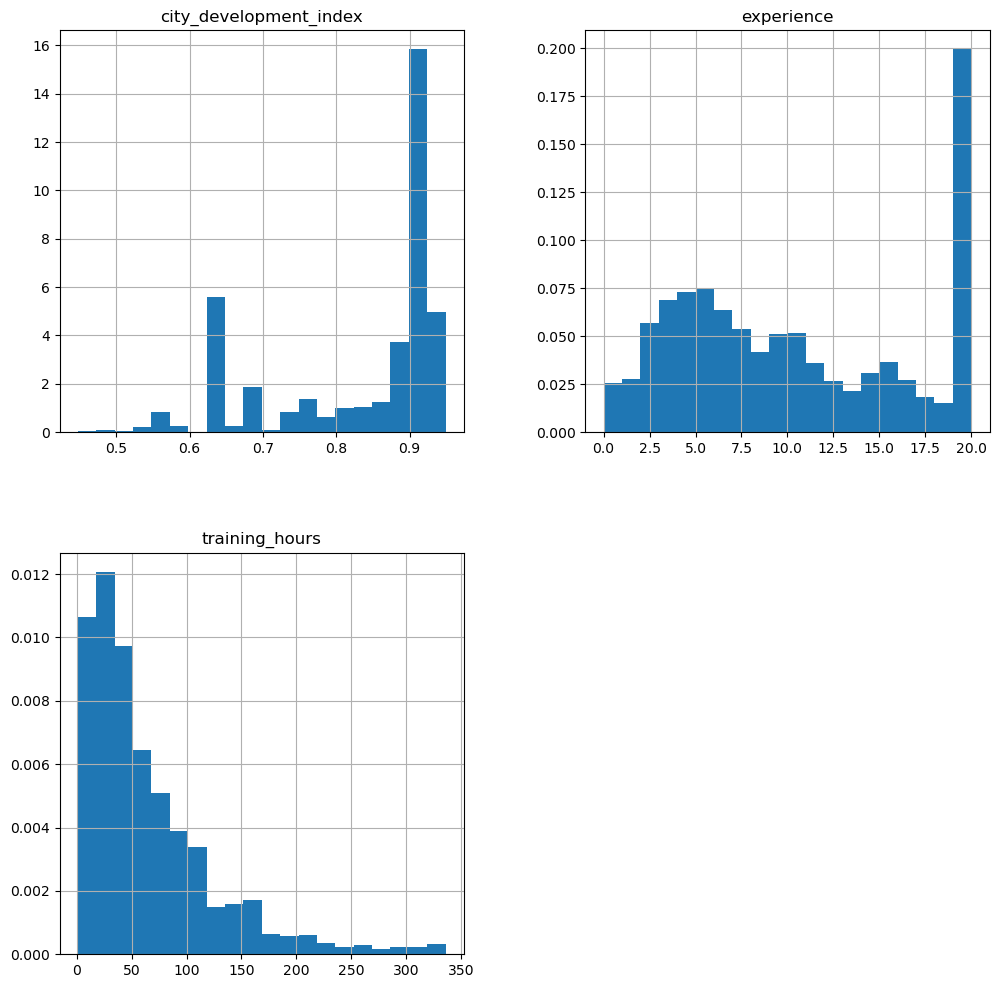

In [19]:
new_df.hist(bins = 20 , density = True , figsize = (12, 12))
plt.show()

<Axes: ylabel='Frequency'>

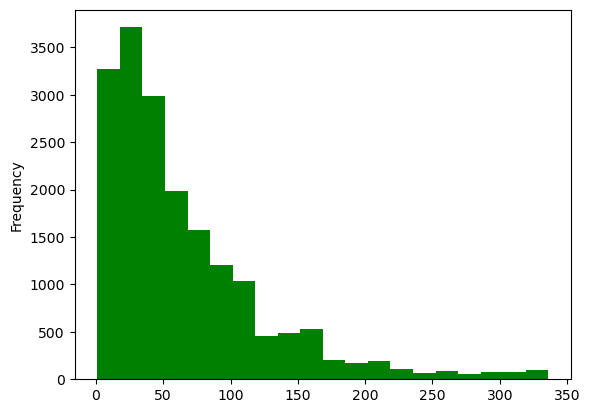

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original_data
df['training_hours'].plot(kind = 'hist' , bins  =20 , color = 'red' , ax =ax)

#new_data
df['training_hours'].plot(kind = 'hist' , bins = 20 , color = 'green' , ax = ax)

<Axes: ylabel='Density'>

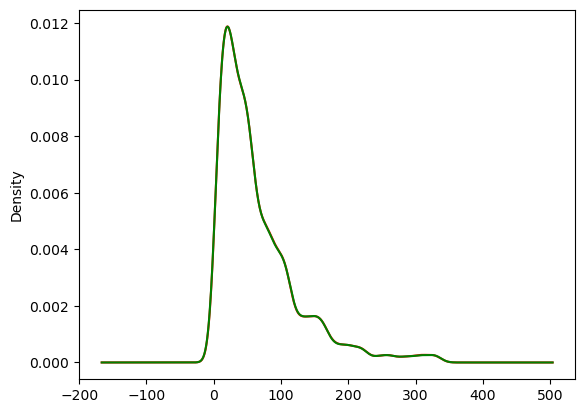

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original_data
df['training_hours'].plot(kind = 'density' , color = 'red')

#new_data
new_df['training_hours'].plot(kind = 'density' , color = 'green')

<Axes: ylabel='Frequency'>

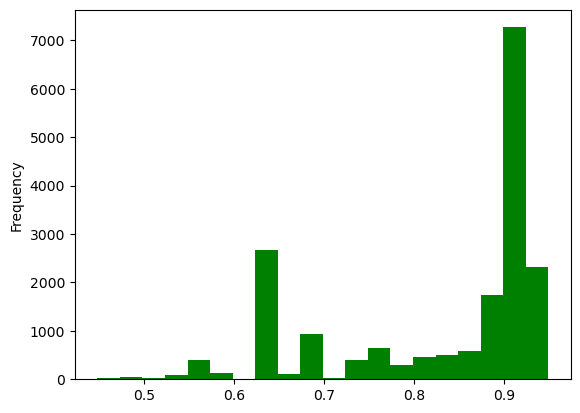

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original_data
df['city_development_index'].plot(kind = 'hist' , bins  =20 , color = 'red' , ax =ax)

#new_data
df['city_development_index'].plot(kind = 'hist' , bins = 20 , color = 'green' , ax = ax)

<Axes: ylabel='Density'>

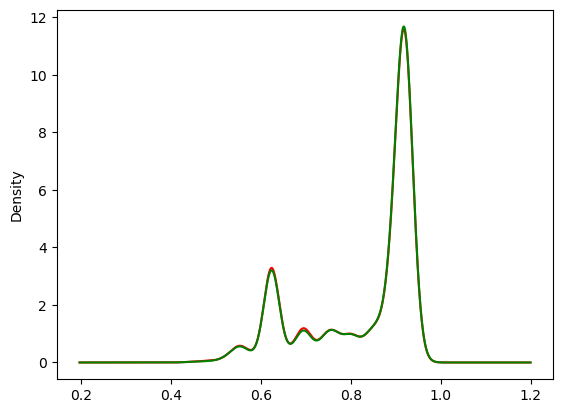

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original_data
df['city_development_index'].plot(kind = 'density' , color = 'red')

#new_data
new_df['city_development_index'].plot(kind = 'density' , color = 'green')

<Axes: ylabel='Frequency'>

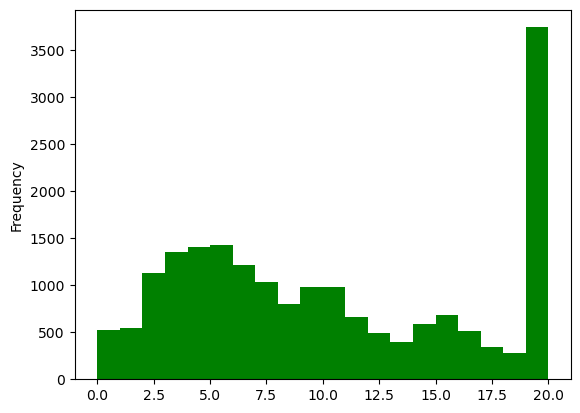

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original_data
df['experience'].plot(kind = 'hist' , bins  =20 , color = 'red' , ax =ax)

#new_data
df['experience'].plot(kind = 'hist' , bins = 20 , color = 'green' , ax = ax)

<Axes: ylabel='Density'>

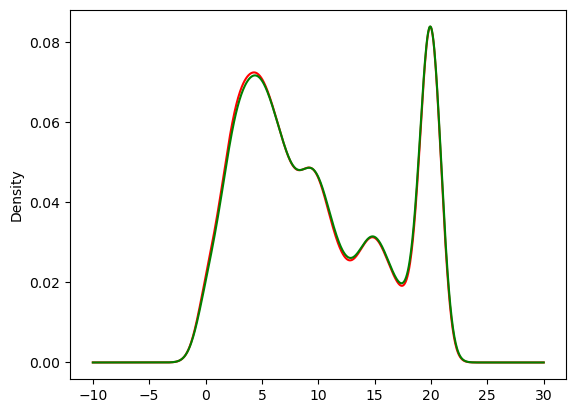

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original_data
df['experience'].plot(kind = 'density' , color = 'red')

#new_data
new_df['experience'].plot(kind = 'density' , color = 'green')

In [30]:
temp = pd.concat([
                  df['enrolled_university'].value_counts()/len(df),
                  new_df['enrolled_university'].value_counts() / len(df)
] , axis = 1)

temp.columns = ['Original' , 'CCA']
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


In [31]:
temp = pd.concat([
                  df['education_level'].value_counts()/len(df),
                  new_df['education_level'].value_counts() / len(df)
] , axis = 1)

temp.columns = ['Original' , 'CCA']
temp

,Original,CCA
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
